## 1. State
* 모든 노드가 공유하는 데이터 저장소
* 공용 화이트 보드
* 모든 노드가 같은 State에 접근하고 수정할 수 있음
    * Race Condition 발생 우려

In [1]:
# Simple State
from typing import TypedDict
class SimpleState(TypedDict):
    name: str
    count: int

## 2. Node
* 실제 작업을 수행하는 Python Function
  * Class로도 정의할 수 있음
  * 현재 상태를 입력으로 받아서 새로운 상태를 결과값으로 반환함

**정의 규칙** 
1. 항상 `state`를 첫 매개변수로 받아야함
2. 딕셔너리 형태로 새로운 상태를 반환해야함
3. 반환되지 않은 필드는 기존값을 유지해야함

In [2]:
# Simple Nodes

# Count를 증가하는 node
def add_count(state):
    return {"count" : state["count"] + 1 }

# 이름을 설정하는 노드
def set_name(state):
    return {"name": "Cheongwoon"}

## 3. Edge
* 노드와 노드 사이를 연결하는 객체
* A작업 진행 후 B 작업을 진행하자고 알려주는 역할

In [3]:
# Simple Edges
from langgraph.graph import StateGraph, START, END
# define StateGraph with defined State
graph = StateGraph(SimpleState)

# Connect nodes
graph.add_node('add_count',add_count) # add_count node 추가
graph.add_node('set_name',set_name) # set_name node 추가

# Connect Edge
graph.add_edge("add_count","set_name")

# START > add_count
graph.add_edge(START, "add_count")
# set_name > END
graph.add_edge("set_name", END)

## 4. Execute
1. 정의한 그래프를 컴파일하여 객체를 선언
2. 선언한 객체에 입력값 주입 (`invoke`)

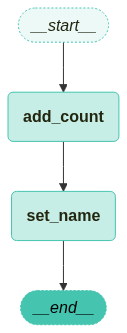

In [5]:
from langchain_teddynote.graphs import visualize_graph
# 그래프 컴파일
app = graph.compile()
# 그래프 시각화
visualize_graph(app)

In [6]:
result = app.invoke(
    {
        "count" : 29,
        "name": " "
    }
)
print(result)

{'name': 'Cheongwoon', 'count': 30}
